# Basic Clustering
## DBSCAN

### Import necessary libraries

In [1]:
import pandas as pd

### Import and display the dataset

We'll use make_moons dataset, which is a built-in dataset in scikit-learn library.

Can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [4]:
df = pd.read_csv("https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Processing
Changing gender into numerical value

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df["Gender"])
gender = encoder.transform(df["Gender"])

In [9]:
df_gender = pd.DataFrame(gender, columns=["gender_num"])

In [12]:
df_process = pd.concat([df, df_gender], axis=1, join="inner")
df_process.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_num
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [13]:
df_process = df_process.drop(columns=["CustomerID", "Gender"])

In [14]:
df_process

,Age,Annual Income (k$),Spending Score (1-100),gender_num
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [15]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   gender_num              200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=300, init="k-means++", n_init=10, random_state=0)
kmeans.fit(df_process)

kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

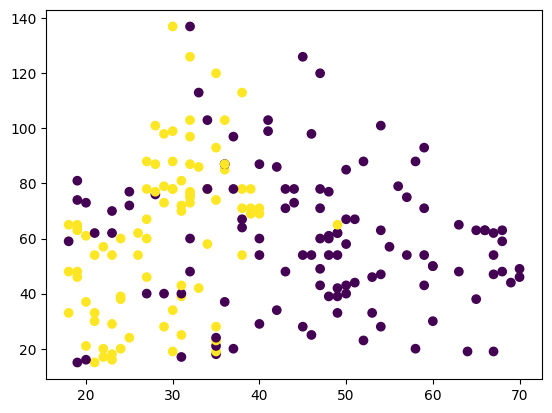

In [20]:
import matplotlib.pyplot as plt

x = df_process["Age"]
y = df_process["Annual Income (k$)"]
plt.scatter(x, y, c=kmeans.labels_, cmap="viridis")
plt.show()

In [22]:
X = df_process[["Annual Income (k$)", "Spending Score (1-100)"]]

model = KMeans(n_clusters=5)
y_pred = model.fit_predict(X)

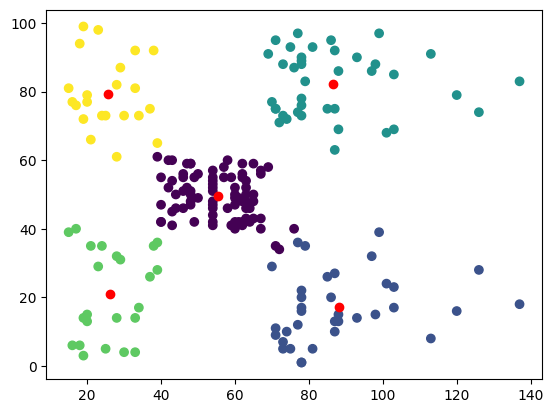

In [23]:
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_pred)

centers = model.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c="red")

In [24]:
df_pred = pd.DataFrame(y_pred, columns=["cluster"])

df_cluster = pd.concat([df_process, df_pred], axis=1, join="inner")
df_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_num,cluster
0,19,15,39,1,3
1,21,15,81,1,4
2,20,16,6,0,3
3,23,16,77,0,4
4,31,17,40,0,3


In [28]:
df_cluster_0 = df_cluster[df_cluster["cluster"] == 0]
df_cluster_1 = df_cluster[df_cluster["cluster"] == 1]
df_cluster_2 = df_cluster[df_cluster["cluster"] == 2]
df_cluster_3 = df_cluster[df_cluster["cluster"] == 3]
df_cluster_4 = df_cluster[df_cluster["cluster"] == 4]

In [29]:
df_cluster_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_num,cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,41.114286,88.200000,17.114286,0.542857,1.0
std,11.341676,16.399067,9.952154,0.505433,0.0
min,19.000000,70.000000,1.000000,0.000000,1.0
25%,34.000000,77.500000,10.000000,0.000000,1.0
50%,42.000000,85.000000,16.000000,1.000000,1.0
75%,47.500000,97.500000,23.500000,1.000000,1.0
max,59.000000,137.000000,39.000000,1.000000,1.0
